In [7]:
import pandas as pd 
import numpy as np 
from pandas.testing import assert_frame_equal
from pandas_datareader import data as web

# Import the plotting library
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [8]:
# Define dataframe variable
btc = pd.DataFrame()

# Define stock that will be analysed
asset = 'BTC-USD'
 
# Import data into dataframe
btc = web.DataReader(asset, data_source='yahoo', start='01-01-2015')

btc.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-01,320.434998,314.002991,320.434998,314.248993,8036550.0,314.248993
2015-01-02,315.838989,313.565002,314.079010,315.032013,7860650.0,315.032013
2015-01-03,315.149994,281.082001,314.846008,281.082001,33054400.0,281.082001
2015-01-04,287.230011,257.612000,281.145996,264.195007,55629100.0,264.195007
2015-01-05,278.341003,265.084015,265.084015,274.473999,43962800.0,274.473999


In [9]:
# calculating Relative Strength Index

rsi_period = 14 
btc_chg = btc['Close'].diff(1)
btc['Gain'] = btc_chg.mask(btc_chg<0,0)
btc['Loss'] = btc_chg.mask(btc_chg > 0,0)

btc['Average Gain'] = btc['Gain'].ewm(com = rsi_period - 1, min_periods = rsi_period).mean()
btc['Average Loss'] = btc['Loss'].ewm(com = rsi_period - 1, min_periods = rsi_period).mean()

rs = abs(btc['Average Gain']/btc['Average Loss'])
rsi = 100-(100/(1+rs))
rsi = pd.DataFrame(rsi)
rsi = rsi.dropna()
rsi = rsi.rename(columns={0: "RSI_14"})
rsi.tail()

,RSI_14
Date,
2020-10-20,80.094243
2020-10-21,81.155172
2020-10-22,80.045280
2020-10-23,81.449239
2020-10-25,78.228906


In [10]:
btc = pd.merge(btc, rsi, right_index=True, left_index=True)
btc.tail()

,High,Low,Open,Close,Volume,Adj Close,Gain,Loss,Average Gain,Average Loss,RSI_14
Date,,,,,,,,,,,
2020-10-20,13184.566406,11900.928711,11913.077148,12823.689453,4.341471e+10,12823.689453,907.354492,0.000000,155.621679,-38.676530,80.094243
2020-10-21,13161.593750,12717.093750,12801.635742,12965.891602,3.472976e+10,12965.891602,142.202148,0.000000,154.663142,-35.913920,81.155172
2020-10-22,13015.961914,12752.647461,12971.548828,12931.539062,2.897498e+10,12931.539062,0.000000,-34.352539,143.615774,-35.802393,80.045280
2020-10-23,13145.066406,12885.747070,12931.574219,13108.062500,2.454232e+10,13108.062500,176.523438,0.000000,145.966322,-33.245079,81.449239
2020-10-25,13329.183594,12910.067383,13017.526367,13012.157227,2.426539e+10,13012.157227,0.000000,-95.905273,135.540156,-37.720808,78.228906


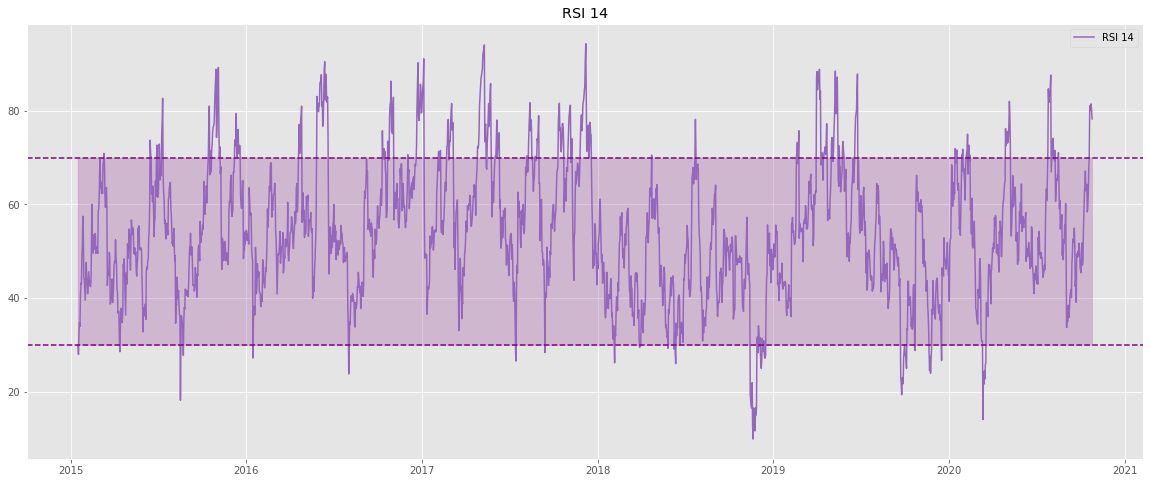

In [15]:
f, ax = plt.subplots(figsize=(20,8))

ax.plot(btc['RSI_14'], color='tab:purple', label = 'RSI 14')
ax.grid(True)
ax.set_title('RSI 14')
ax.legend()
plt.axhline(y = 30, color = 'purple', linestyle = 'dashed')
plt.axhline(y = 70, color = 'purple', linestyle = 'dashed')
ax.fill_between(btc.index, 70, 30, color='purple', alpha =.2)

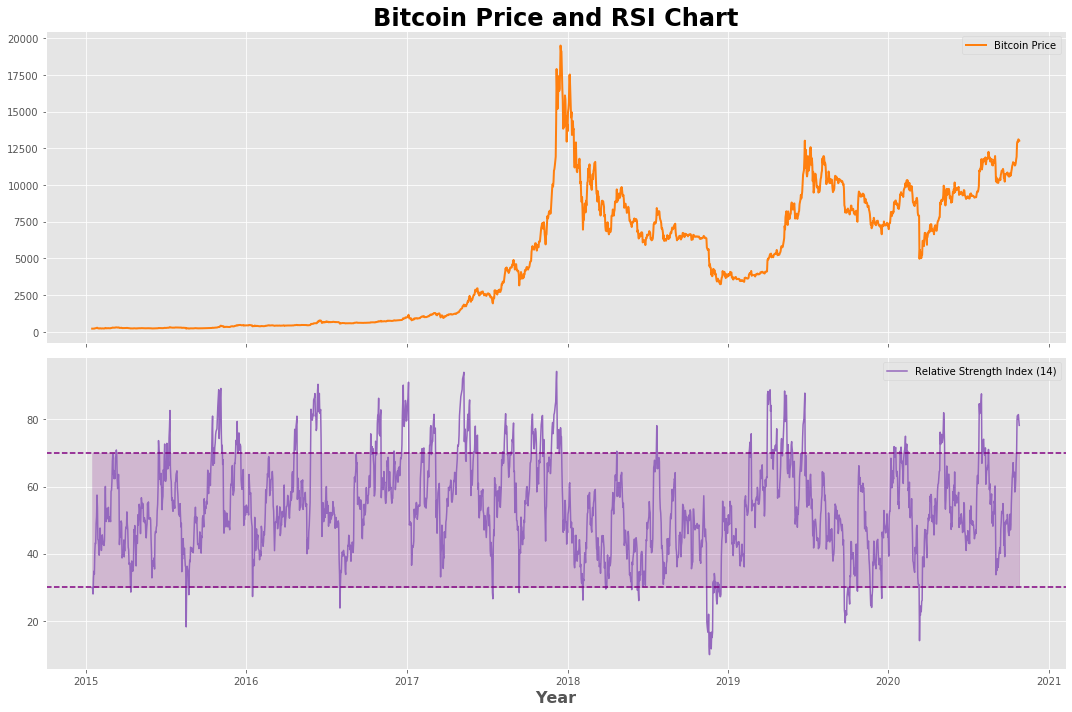

In [23]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(15, 10))

ax1.plot(btc['Close'], color='tab:orange', label = 'Bitcoin Price', lw=2)
ax1.grid(True)
ax1.set_title('Daily Prices')
ax1.legend()

ax2.plot(btc.index, btc['RSI_14'], label='Relative Strength Index (14)', color = 'tab:purple')
ax2.grid(True)
ax2.legend()
ax2.set_xlabel('Year', fontsize=16, fontweight = 'bold')
ax1.set_title('Bitcoin Price and RSI Chart', fontsize=24, fontweight='bold')
plt.axhline(y = 30, color = 'purple', linestyle = 'dashed')
plt.axhline(y = 70, color = 'purple', linestyle = 'dashed')
ax2.fill_between(btc.index, 70, 30, color='purple', alpha =.2)
ax2.legend()

plt.tight_layout()
plt.show()